In [105]:
# set up
%pylab
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2
from PIL import Image
from tqdm import tqdm

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
def is_sad(rgb_pixel, threshhold=10):
    R, G, B = map(int, rgb_pixel)
    diff1 = np.abs(R - G)
    diff2 = np.abs(G - B)
    diff3 = np.abs(R - B)
    return  diff1 < threshhold \
            and diff2 < threshhold \
            and diff3 < threshhold

In [107]:
def make_happy(img, dist, threshhold=10):
    img_arr = np.array(img)
    X = img_arr.reshape(-1, img_arr.shape[-1])
    for i, pixel in enumerate(X):
        if is_sad(pixel, threshhold):
            TODO
    
    return X.reshape(img_arr.shape)

def mark_grey(img, threshhold=10):
    img_arr = np.array(img)
    X = img_arr.reshape(-1, img_arr.shape[-1])
    for i, pixel in enumerate(X):
        if is_sad(pixel, threshhold):
            X[i] = np.array([255, 0, 0])
    
    return X.reshape(img_arr.shape)

def make_sad(img, threshhold=10):
    img_arr = np.array(img)
    X = img_arr.reshape(-1, img_arr.shape[-1])
    
    for i, pixel in enumerate(X):
        if not is_sad(pixel, threshhold):
            R, G, B = map(int, pixel)
            avg = (0.3 * R) + (0.59 * G) + (0.11 * B)
            X[i] = np.array([avg, avg, avg])
            
    return X.reshape(img_arr.shape)

In [108]:
def show_images(img, compress_func, threshhold=10):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
    compressed_image = compress_func(img, threshhold)

    ax1.imshow(img)
    ax1.set_title('Original Image')
    ax2.imshow(compressed_image)
    ax2.set_title(f'Image compressed with {threshhold} threshhold')

In [109]:
Images = [Image.open('Images/small1.png'),
          Image.open('Images/small2.jpg'),
          Image.open('Images/bridge.jpg'),
          Image.open('Images/unicorn.jpg'),
          Image.open('Images/weather.jpg'),
         ]  

Marking grey colours: 100%|██████████| 5/5 [00:08<00:00,  1.76s/it]


CPU times: user 8.7 s, sys: 75 ms, total: 8.77 s
Wall time: 8.82 s


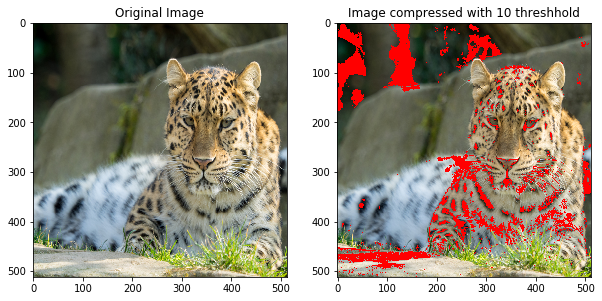

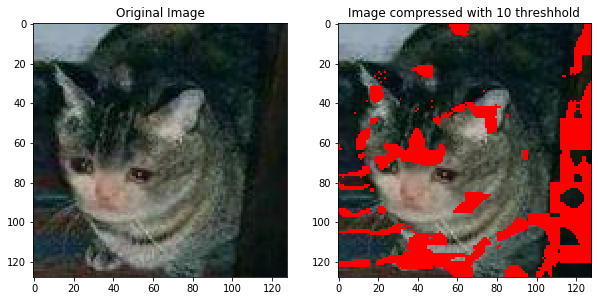

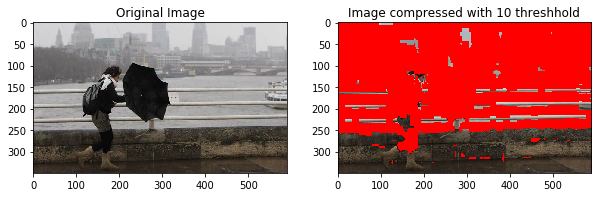

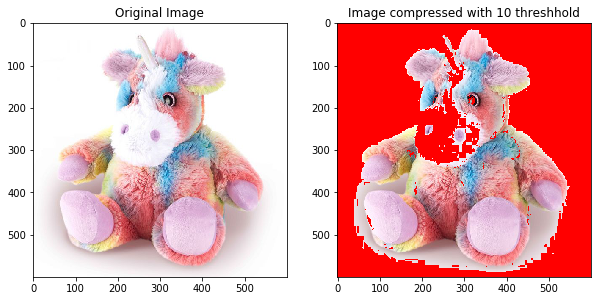

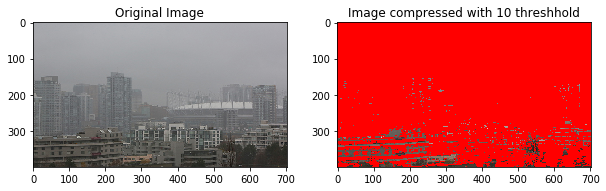

In [110]:
%%time
# finding grey threshhold
for img in tqdm(Images, desc='Marking grey colours', position=0, leave=True):
    show_images(img, mark_grey, threshhold=10)

Making images sad: 100%|██████████| 5/5 [00:10<00:00,  2.16s/it]


CPU times: user 10.4 s, sys: 206 ms, total: 10.6 s
Wall time: 10.8 s


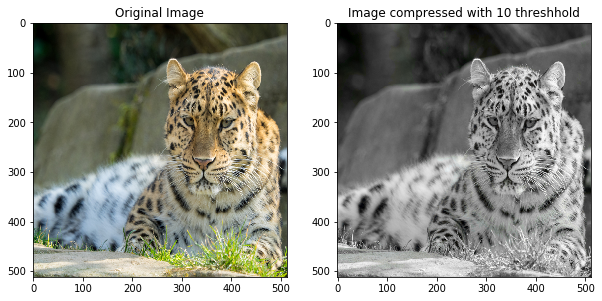

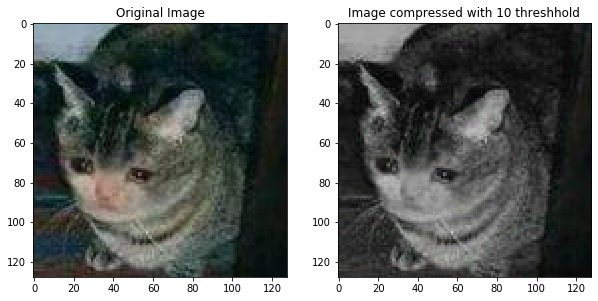

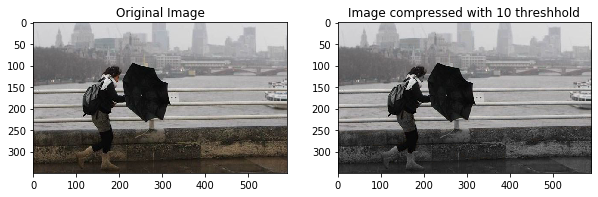

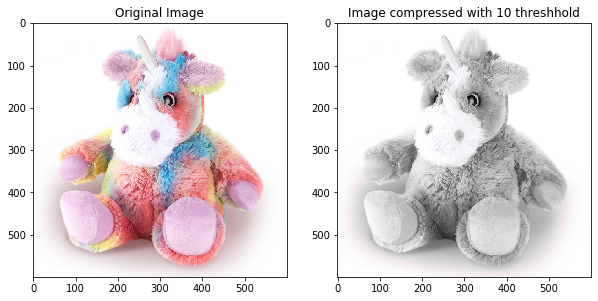

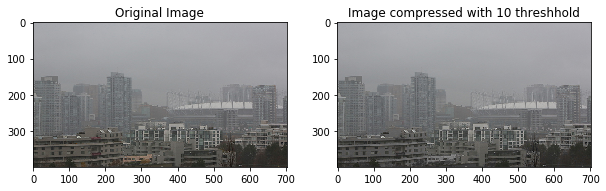

In [111]:
%%time
# making images sad
for img in tqdm(Images, desc='Making images sad', position=0, leave=True):
    show_images(img, make_sad, threshhold=10)